# Assignment 2: Gradient Descent

The goal of this exercise is to gain experience with a basic technique of Deep Learning, i.e., gradient descent.
A two-dimensional loss surface is created manually and gradient descent is implemented.
Several runs of gradient descent from different starting locations will be performed.
The loss surface and the detected minima are plotted together in one 3D plot.

## Compute the Gradient
The loss function is manually defined as: $$\mathcal J_{\vec w}=w_1^2 + w_2^2 + 40 \cos(w_1) \cos(w_2) + w_1 \sin(w_2)$$
The weights $\vec w = (w_1, w_2)^T$ shall be optimized such that the loss function has a minimum.

### Task 1: Compute the Gradient

The gradient $\nabla \mathcal J_{\vec w}$ is defined as the partial derivatives of the loss function with respect to the two variables $w_1$ and $w_2$.
We need to calculate it:

* $\frac{\partial \mathcal J}{\partial w_1} = 2 * w_1 - 40 sin(w_1) * cos(w_2) + sin(w_2)$
* $\frac{\partial \mathcal J}{\partial w_2} = 2 * w_2 - 40 sin(w_2) * cos(w_1) + w_1 * cos(w_2)$

### Task 2: Implement the Loss Function

Implement the loss function in Python, which takes a given $\vec w$ and returns $\mathcal J_{\vec w}$ according to the given loss function.

In [2]:
import numpy as np

def loss(w):
  w1 = w[0]
  w2 = w[1]
  return np.square(w1) + np.square(w2) + 40 * np.cos(w1)*np.cos(w2) + w1*np.sin(w2)

### Task 3: Implement the Gradient

Implement the gradient as a function in Python, which takes a given $\vec w$ and returns $\nabla\mathcal J_{\vec w}$ according to the analytical result in Task 1. 
Remember that the gradient needs to be computed and returned for both $w_1$ and $w_2$.

In [3]:
def gradient(w):
  w_1=w[0]
  w_2=w[1]
  w1_partdev = 2 * w_1 - 40 * np.sin(w_1) * np.cos(w_2) + np.sin(w_2)
  w2_partdev = 2 * w_2 - 40 * np.sin(w_2) * np.cos(w_1) + w_1 * np.cos(w_2)

  return np.array((w1_partdev, w2_partdev))

### Test 1: Test Functions 
The codes below call the loss function from Task 2 and the gradient function from Task 3 with $\vec w=(0,0)^T$, and then compare the return values with the given analytically computed values. 
Please check your implementation if the tests cannot be passed. 

Make sure your code can pass the test before moving to the next task.

In [4]:
w = np.zeros(2)

# analytically computed expected values
expected_loss = 40
expected_gradient = np.array((0.,0.))

# test loss function
assert abs(loss(w) - expected_loss) < 1e-8
assert np.all(np.abs(np.array(gradient(w)) - expected_gradient) < 1e-8)
print("Tests passed")

Tests passed


## Implement Gradient Descent
The procedure of gradient decent is the repeated application of two steps:

* First, the gradient of the loss $\nabla\mathcal J_{\vec w}$ is computed based on the current value of the parameters $\vec w$.

* Second, the weights are updated by moving a small step in the direction of the negative gradient: $\vec w = \vec w - \eta\nabla\mathcal J_{\vec w}$

Optionally, the loss $\mathcal J_{\vec w}$ is computed to record the progress of the gradient descent.
Finally, one or more appropriate criteria need to be defined to decide when to stop the procedure.

### Task 4: Termination Criterion

(theoretical question) Define a proper termination criterion. Which error cases might occur and need to be considered?

A proper termination criterion for gradient descent is when the delta in the loss function between two consecutive iterations falls below a certain threshold, or when the magnitude of the gradient falls below a certain threshold. This indicates that the optimization algorithm has converged to a minimum of the loss function. We define a minimum threshold of gradient improvement at 0.000001 (current loss - new loss). This avoids getting stuck in a plateau during one iteration.

Possible errors for gradient descent are: 
* Getting stuck in a local minimum or a plateau: Gradient descent is prone to getting stuck in local minima or plateaus, where the gradient is close to zero but the loss function is not yet at its global minimum.

* Divergence: Gradient descent can also diverge, where the weights move too far in the direction of the gradient and the loss function increases instead of decreasing. This can be caused by a too large learning rate or unstable gradients, and can be mitigated by reducing the learning rate or using more advanced optimization algorithms.

* Overfitting: Gradient descent can also lead to overfitting, where the model performs well on the training data but poorly on the test data. This can be mitigated by using regularization techniques such as L1 or L2 regularization.

* Underfitting: Gradient descent may underfit, i.e. the model is too simple and does not capture the complexity of the data. This can be mitigated by increasing the complexity of the model or collecting more data.


### Task 5: Implement Gradient Descent

Implement a function that performs the gradient descent. This function should take as parameters an initial weight vector $\vec w$ and a learning rate $\eta$, and make use of the gradient function implemented in Task 3 and, possibly, the loss function from Task 2.
It should return the optimized weight vector $\vec w^*$. Incorporate the termination criterion designed in Task 4.

In [5]:
def gradient_descent(w, eta=0.01):
    # Copy the weights to not modify the original values.
    w_star = w.copy()
    # Initialize the iteration counter.
    max_iter = 0
    # Perform iterative gradient descent.
    while max_iter < 1000:
        # Computing the loss & gradient for current w.
        curr_loss = loss(w_star)
        grad = gradient(w_star)
        
        # Update the weights.
        w_star = w_star - eta * grad
        
        # Incrementing the iteration counter.
        max_iter += 1 

        # Stopping cireteria.
        # 1: little change in loss.
        loss_new = loss(w_star)
        if np.abs(curr_loss - loss_new) < 1e-6:
            break
            
        # 2: gradient is close to 0.
        if np.linalg.norm(grad) < 1e-6:
            break

    return w_star

## Evaluate Gradient Descent

### Task 6: Run Gradient Descent
Call the gradient descent function from Task 5 1000 times with different random weights $\vec w\in[-5,5]^2$ drawn from a uniform distribution and a learning rate of $\eta=0.01$. 
Store the resulting optimized weight vectors in a list.

In [6]:
stored_weights = []

for i in range(1000):
  # create random weight vector
  w = np.random.uniform(-5, 5, 2)
  # call gradient descent
  w_star = gradient_descent(w, eta=0.01)
  # store it in the list
  stored_weights.append(w_star)

### Test 2: Check Minima

Counting the number of local minima in our loss function, we reach a total of 12. Please use this function to verify that your implementation could reach this number at maximum.

Again, make sure you pass the test before moving to the next task.

In [7]:
maximum_number_of_minima = 12

# compute the number of reached minima 
minima = []
for w_star in stored_weights:
  # check if this weight vector is far enough 
  # from all previously stored vectors
  if all(np.linalg.norm(w_star-w) > 1e-3 for w in minima):
    minima.append(w_star)
print(len(minima))
number_of_minima = len(minima)

assert number_of_minima <= maximum_number_of_minima

print("Check passed. The number of minima", number_of_minima, "is lower than or equal to the maximum", maximum_number_of_minima)

12
Check passed. The number of minima 12 is lower than or equal to the maximum 12


### Task 7: Find the Global Minimum

Find the global minimum of our error function by evaluating the obtained optimized weight vectors from Task 6. 
Print the minimum and its loss value.

In [8]:
# find the lowest loss
minima_index = np.argmin([loss(m) for m in minima])
minimum_loss = loss(minima[minima_index])
minimum_weights = minima[minima_index]
#print(minima)
    

print("The minimum loss value of:", minimum_loss, "was found for minimum", minimum_weights)

The minimum loss value of: -30.70880075548177 was found for minimum [-2.9928836   0.07197497]


## Plot Error Surface and Points

### Task 8: Loss Surface Plot

Plot the error surface of the given loss function. 
Limit range $\vec w\in[-10,10]^2$. 
For each of the optimized weights from Task 6, plot a marker into the 3D plot. 
An example can be found in the slides.

When plotting the resulting optimized weights $\vec w=(w_1, w_2)^T$, we need to define the third coordinate. 
What should this coordinate be?

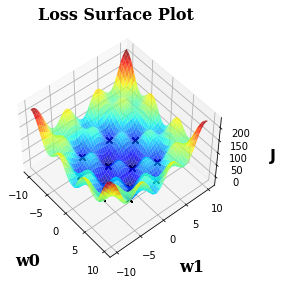

In [22]:
from matplotlib import pyplot

# create 3D axis
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d', azim = -40, elev=50)

# define range to plot
w_range = np.linspace(-10,10)
w1, w2 = np.meshgrid(w_range, w_range)

# compute loss for w1 and w2
J = loss(np.array([w1,w2]))

# plot surface with jet colormap
axis.plot_surface(w1, w2, J, cmap="jet", alpha=0.8)

# make the plot more beautiful
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
pyplot.title('Loss Surface Plot',pad=20.0, fontdict=font)
pyplot.xlabel("w0", fontdict=font, labelpad=20.0)
pyplot.ylabel("w1", fontdict=font, labelpad=15.0)
axes = figure.gca()
axes.set_zlabel("J", fontsize=16, labelpad=1.0, fontweight='bold')
# plot resulting points in 3D
for w_star in stored_weights:
  # compute the z-position
  z = loss(w_star)
  # plot as 3D point
  axis.plot([w_star[0]], [w_star[1]], [z], "kx")
  